In [96]:
import pandas as pd
import numpy as np

## 10.2.1 Timestamp 的构造与属性

In [97]:
ts = pd.Timestamp('2023-7-21')
ts

Timestamp('2023-07-21 00:00:00')

In [98]:
ts = pd.Timestamp('2023-7-21 16:01')
ts

Timestamp('2023-07-21 16:01:00')

In [99]:
ts.year

2023

In [100]:
ts.month

7

In [101]:
ts.day

21

In [102]:
ts.hour

16

In [103]:
ts.minute

1

In [104]:
ts.second

0

## 10.2.2 Datetime 序列的生成

In [105]:
#一组时间戳可以组成时间序列，可以用to_datetime 和date_range 来生成。
#其中，to_datetime 能够把一列时间戳格式的对象转换成为datetime64[ns] 类型的时间序列
pd.to_datetime(['2021-1-14','2022-4-23','2023-6-7'])

DatetimeIndex(['2021-01-14', '2022-04-23', '2023-06-07'], dtype='datetime64[ns]', freq=None)

In [106]:
df = pd.read_csv('E:\MyProject\joyful-pandas-master/data/learn_pandas.csv')
df.head()

,School,Grade,Name,Gender,Height,Weight,Transfer,Test_Number,Test_Date,Time_Record
0,Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,158.9,46.0,N,1,2019/10/5,0:04:34
1,Peking University,Freshman,Changqiang You,Male,166.5,70.0,N,1,2019/9/4,0:04:20
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,188.9,89.0,N,2,2019/9/12,0:05:22
3,Fudan University,Sophomore,Xiaojuan Sun,Female,NaN,41.0,N,2,2020/1/3,0:04:08
4,Fudan University,Sophomore,Gaojuan You,Male,174.0,74.0,N,2,2019/11/6,0:05:22


In [107]:
s = pd.to_datetime(df['Test_Date'])
s.head()

0   2019-10-05
1   2019-09-04
2   2019-09-12
3   2020-01-03
4   2019-11-06
Name: Test_Date, dtype: datetime64[ns]

In [108]:
temp = pd.to_datetime(['2022\\2\\15','2023\\11\\4'],format='%Y\\%m\\%d')
temp

DatetimeIndex(['2022-02-15', '2023-11-04'], dtype='datetime64[ns]', freq=None)

In [109]:
#如果想要转为datetime64[ns] 的序列，需要显式用Series 转化
pd.Series(temp).head()

0   2022-02-15
1   2023-11-04
dtype: datetime64[ns]

In [110]:
df_date_cols = pd.DataFrame({'year':[2023,2023],
                             'month':[1,6],
                             'day':[31,25],
                            'hour':[12,16],
                           'minute':[30,29],
                           'second':[14,27]})
pd.to_datetime(df_date_cols)
#把表的多列时间属性拼接转为时间序列的to_datetime 操作，此时的列名必须和以下给定的时间关键词列名一致

0   2023-01-31 12:30:14
1   2023-06-25 16:29:27
dtype: datetime64[ns]

In [111]:
#date_range 是一种生成连续间隔时间的一种方法，其重要的参数为start, end, freq, periods ，
#它们分别表示开始时间，结束时间，时间间隔，时间戳个数
pd.date_range(start = '2022-9-8',end = '2023-1-16',periods = 5)

DatetimeIndex(['2022-09-08 00:00:00', '2022-10-10 12:00:00',
               '2022-11-12 00:00:00', '2022-12-14 12:00:00',
               '2023-01-16 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [112]:
#开始或结束日期如果作为端点则它会被包含
pd.date_range(start='2020-1-1',end='2020-1-11',freq = '10D')

DatetimeIndex(['2020-01-01', '2020-01-11'], dtype='datetime64[ns]', freq='10D')

In [113]:
pd.date_range(start='2020-1-1',end='2020-2-28',freq='10D')

DatetimeIndex(['2020-01-01', '2020-01-11', '2020-01-21', '2020-01-31',
               '2020-02-10', '2020-02-20'],
              dtype='datetime64[ns]', freq='10D')

In [114]:
pd.date_range('2020-1-1','2020-2-28', periods=6) # 由于结束日期无法取到，freq 不为10 天

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-12 14:24:00',
               '2020-01-24 04:48:00', '2020-02-04 19:12:00',
               '2020-02-16 09:36:00', '2020-02-28 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [115]:
#改变序列采样频率的方法asfreq ，它能够根据给定的freq 对序列进行类似于reindex 的操作
s = pd.Series(np.random.rand(5),index = pd.to_datetime(['2021-1-%d'%i for i in range(11,20,2)]))
s

2021-01-11    0.942613
2021-01-13    0.097920
2021-01-15    0.255961
2021-01-17    0.097467
2021-01-19    0.848534
dtype: float64

In [116]:
s.asfreq('D')
#改变频率为一天一次

2021-01-11    0.942613
2021-01-12         NaN
2021-01-13    0.097920
2021-01-14         NaN
2021-01-15    0.255961
2021-01-16         NaN
2021-01-17    0.097467
2021-01-18         NaN
2021-01-19    0.848534
Freq: D, dtype: float64

In [117]:
s.asfreq('12H').head()

2021-01-11 00:00:00    0.942613
2021-01-11 12:00:00         NaN
2021-01-12 00:00:00         NaN
2021-01-12 12:00:00         NaN
2021-01-13 00:00:00    0.097920
Freq: 12H, dtype: float64

## 10.2.3 dt 对象

In [118]:
#这里对于datetime64[ns] 类型而言，可以大致分为三类操作：取出时间相关的属性、判断时间戳是否满足条件、取整操作
s = pd.Series(pd.date_range(start='2020-1-3',end='2020-1-7',freq='D')).head()
s.dt.date
s.dt.year
s.dt.month
s.dt.day
s.dt.daysinmonth
#取出时间相关属性

0    31
1    31
2    31
3    31
4    31
dtype: int32

In [119]:
s.dt.dayofweek
#它返回了周中的星期情况，周一为0、周二为1

0    4
1    5
2    6
3    0
4    1
dtype: int32

In [120]:
#通过month_name, day_name 返回英文的月名和星期名，他是方法而不是属性
s.dt.month_name()
s.dt.day_name()

0      Friday
1    Saturday
2      Sunday
3      Monday
4     Tuesday
dtype: object

In [121]:
#第二类判断操作主要用于测试是否为月/季/年的第一天或者最后一天
s.dt.is_year_start # 还可选is_quarter/month_start

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [122]:
s.dt.is_year_end # 还可选is_quarter/month_end

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [123]:
#第三类的取整操作包含round, ceil, floor ，它们的公共参数为freq ，
#常用的包括H, min, S （小时、分钟、秒），所有可选的freq 可参考此处
s = pd.Series(pd.date_range(start = '2021-3-14 20:00',end = '2021-3-14 23:00',freq = '45min'))
s

0   2021-03-14 20:00:00
1   2021-03-14 20:45:00
2   2021-03-14 21:30:00
3   2021-03-14 22:15:00
4   2021-03-14 23:00:00
dtype: datetime64[ns]

In [124]:
s.dt.round('1H')
#取到最近接近的时间点

0   2021-03-14 20:00:00
1   2021-03-14 21:00:00
2   2021-03-14 22:00:00
3   2021-03-14 22:00:00
4   2021-03-14 23:00:00
dtype: datetime64[ns]

In [125]:
s.dt.ceil('1H')
#向大的方向取整

0   2021-03-14 20:00:00
1   2021-03-14 21:00:00
2   2021-03-14 22:00:00
3   2021-03-14 23:00:00
4   2021-03-14 23:00:00
dtype: datetime64[ns]

In [126]:
s.dt.floor('1H')
#只取小时

0   2021-03-14 20:00:00
1   2021-03-14 20:00:00
2   2021-03-14 21:00:00
3   2021-03-14 22:00:00
4   2021-03-14 23:00:00
dtype: datetime64[ns]

## 10.2.4 时间戳的切片与索引

In [127]:
s = pd.Series(np.random.randint(2,size = 366),#表示生成的随机整数矩阵的随机数范围，其中 "2" 表示随机整数的范围是 [0, 2)，生成矩阵大小为366的一维数组
              index=pd.date_range('2022-1-1','2023-1-1'))
idx = pd.Series(s.index).dt
s.head()

2022-01-01    1
2022-01-02    1
2022-01-03    0
2022-01-04    1
2022-01-05    1
Freq: D, dtype: int32

In [128]:
s[(idx.is_month_start|idx.is_month_end).values].head()
#筛选出每月第一天或者最后一天

2022-01-01    1
2022-01-31    0
2022-02-01    1
2022-02-28    0
2022-03-01    1
dtype: int32

In [129]:
s[(idx.dayofweek.isin([5,6]).values)].head()
#筛选出双休日

2022-01-01    1
2022-01-02    1
2022-01-08    1
2022-01-09    1
2022-01-15    1
dtype: int32

In [130]:
s['2022-1-1']#取出单日值
s['2022-1'].head()#取出单月
s['2022-3':'2022-4-5'].head()#取出3月初至4.5
s['2022-3':'2022-4-5'].tail()

2022-04-01    0
2022-04-02    0
2022-04-03    0
2022-04-04    0
2022-04-05    0
Freq: D, dtype: int32

# 10.3 时间差
## 10.3.1 Timedelta 的生成

In [131]:
#时间差可以理解为两个时间戳的差
pd.Timestamp('2020-1-3 8:00:30')-pd.Timestamp('2020-1-2 7:50:20')

Timedelta('1 days 00:10:10')

In [132]:
pd.Timedelta(days = 1,minutes = 30)
pd.Timedelta('1 days 30 minutes')

Timedelta('1 days 00:30:00')

In [133]:
#生成时间差序列的主要方式是pd.to_timedelta ，其类型为timedelta64[ns]

In [141]:
s = pd.to_timedelta(df.Time_Record)
s.head()

0   0 days 00:04:34
1   0 days 00:04:20
2   0 days 00:05:22
3   0 days 00:04:08
4   0 days 00:05:22
Name: Time_Record, dtype: timedelta64[ns]

In [142]:
#与date_range 一样，时间差序列也可以用timedelta_range 来生成
pd.timedelta_range('0s','1000s',freq='6min')

TimedeltaIndex(['0 days 00:00:00', '0 days 00:06:00', '0 days 00:12:00'], dtype='timedelta64[ns]', freq='6T')

In [143]:
pd.timedelta_range('0s','1000s',periods = 3)

TimedeltaIndex(['0 days 00:00:00', '0 days 00:08:20', '0 days 00:16:40'], dtype='timedelta64[ns]', freq=None)

In [145]:
#对于Timedelta 序列，同样也定义了dt 对象，上面主要定义了的属性包括
#days, seconds, mircroseconds,nanoseconds ，它们分别返回了对应的时间差特征
#seconds 不是指单纯的秒，而是对天数取余后剩余的秒数：
s.dt.seconds.head()

0    274
1    260
2    322
3    248
4    322
Name: Time_Record, dtype: int32

In [147]:
s.dt.total_seconds().head()#不对天数取余计算秒数

0    274.0
1    260.0
2    322.0
3    248.0
4    322.0
Name: Time_Record, dtype: float64

In [151]:
pd.to_timedelta(df.Time_Record).dt.round('min').head()#取到最近接近的时间点

0   0 days 00:05:00
1   0 days 00:04:00
2   0 days 00:05:00
3   0 days 00:04:00
4   0 days 00:05:00
Name: Time_Record, dtype: timedelta64[ns]

## 10.3.2 Timedelta 的运算

In [180]:
td1 = pd.Timedelta(days = 1)
td2 = pd.Timedelta(days = 4)
ts = pd.Timestamp('2023-7-23')

In [181]:
td1*2

Timedelta('2 days 00:00:00')

In [182]:
td2-td1

Timedelta('3 days 00:00:00')

In [183]:
ts-td1

Timestamp('2023-07-22 00:00:00')

In [197]:
td1 = pd.timedelta_range(start = '1days',periods = 5)#(1,2,3,4,5)
td2 = pd.timedelta_range(start = '12hours',freq = '1H',periods = 5)#(['0 days 12:00:00', '0 days 13:00:00', '0 days 14:00:00','0 days 15:00:00', '0 days 16:00:00']
ts = pd.date_range('20220506','20220510')

In [198]:
td1*5

TimedeltaIndex(['5 days', '10 days', '15 days', '20 days', '25 days'], dtype='timedelta64[ns]', freq='5D')

In [199]:
td1*pd.Series(list(range(5)))#逐个相乘（1，2，3，4，5）*（0，1，2，3，4）

0    0 days
1    2 days
2    6 days
3   12 days
4   20 days
dtype: timedelta64[ns]

In [200]:
td1-td2

TimedeltaIndex(['0 days 12:00:00', '1 days 11:00:00', '2 days 10:00:00',
                '3 days 09:00:00', '4 days 08:00:00'],
               dtype='timedelta64[ns]', freq=None)

In [201]:
td1 + pd.Timestamp('2020-1-1')

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05',
               '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

In [202]:
td1 + ts#日期个数必须对齐

DatetimeIndex(['2022-05-07', '2022-05-09', '2022-05-11', '2022-05-13',
               '2022-05-15'],
              dtype='datetime64[ns]', freq=None)

# 10.4 日期偏置
## 10.4.1 Offset 对象

In [203]:
#日期偏置是一种和日历相关的特殊时间差，例如回到第一节中的两个问题：
#如何求2020 年9 月第一个周一的日期，以及如何求2020 年9 月7 日后的第30 个工作日是哪一天
pd.Timestamp('20200831') + pd.offsets.WeekOfMonth(week=0,weekday=0)

Timestamp('2020-09-07 00:00:00')

In [205]:
pd.Timestamp('20200907')+pd.offsets.BDay(30)

Timestamp('2020-10-19 00:00:00')

In [207]:
#Offset 对象在pd.offsets 中被定义。当使用+ 时获取离其最近的下一个日期，当使用- 时获取离其最近的上一个日期
pd.Timestamp('20200830')-pd.offsets.WeekOfMonth(week = 0,weekday=0)#八月第一个周一的日期

Timestamp('2020-08-03 00:00:00')

In [208]:
pd.Timestamp('20200830')-pd.offsets.BDay(30)

Timestamp('2020-07-20 00:00:00')

In [216]:
pd.Timestamp('20200829')-pd.offsets.BDay(30)

Timestamp('2020-07-20 00:00:00')

In [213]:
pd.Timestamp('20200907')-pd.offsets.MonthEnd()#距离最近的一个月末

Timestamp('2020-08-31 00:00:00')

In [221]:
#CDay ，其中的holidays, weekmask 参数能够分别对自定义的日期和星期进行过滤，
#前者传入了需要过滤的日期列表，后者传入的是三个字母的星期缩写构成的星期字符串，其作用是只保留字符串中出现的星期
my_filter = pd.offsets.CDay(n = 1,weekmask = 'Thu Sat',holidays = ['20200109'])
#weekmask参数用于定义一周的工作日规则
#holidays 参数可以传入一个日期数组，表示工作日偏移量中要跳过的假期日期。
#如果某个日期在 holidays 数组中，那么在进行日期偏移计算时将会跳过这些假期日期
dr = pd.date_range(start='20200106',end='20200111')

In [223]:
dr.to_series().dt.dayofweek

2020-01-06    0
2020-01-07    1
2020-01-08    2
2020-01-09    3
2020-01-10    4
2020-01-11    5
Freq: D, dtype: int32

In [224]:
[i + my_filter for i in dr]

[Timestamp('2020-01-09 00:00:00'),
 Timestamp('2020-01-09 00:00:00'),
 Timestamp('2020-01-09 00:00:00'),
 Timestamp('2020-01-11 00:00:00'),
 Timestamp('2020-01-11 00:00:00'),
 Timestamp('2020-01-16 00:00:00')]

## 10.4.2 偏置字符串

<br />M：代表月历日历，表示每个月的最后一个日历日。
<br />A：代表年历日历，表示每年的最后一个日历日。
<br />Q：代表季度日历，表示每个季度的最后一个日历日。
<br />BM：代表工作月频率（Business Month），表示每个月的最后一个工作日。
<br />BA：代表工作年频率（Business Year），表示每年的最后一个工作日。
<br />BQ：代表工作季度频率（Business Quarter），表示每个季度的最后一个工作日。
<br />W：代表周频率（Week），表示每周的最后一天（通常为周日）。

In [248]:
#pd.date_range('20200101','20200401',freq='MS')#筛选出月份区间的第一天(月初)
#pd.date_range('20200101','20200401',freq=pd.offsets.MonthBegin())

#pd.date_range('20200101','20200401',freq='M')#筛选出月份区间的最后一天(月末)
#pd.date_range('20200101','20200401',freq=pd.offsets.MonthEnd())

#pd.date_range('20200101','20200110',freq = 'B')#筛选出工作日
#pd.date_range('20200101','20200110',freq = pd.offsets.BDay())

#pd.date_range('20200101','20200301',freq='W-TUE')#周二
#pd.date_range('20200101','20200301',freq=pd.offsets.CDay(weekmask='Tue'))

#pd.date_range('20200101','20200401',freq='WOM-3THU')#每个月的第三个周四
pd.date_range('20200101','20200401',freq=pd.offsets.WeekOfMonth(week=2,weekday=3))


DatetimeIndex(['2020-01-16', '2020-02-20', '2020-03-19'], dtype='datetime64[ns]', freq='WOM-3THU')

# 10.5 时序中的滑窗与分组
## 10.5.1 滑动窗口

In [250]:
import matplotlib.pyplot as plt
idx = pd.date_range('20200101', '20201231', freq='B')
np.random.seed(2020)
data = np.random.randint(-1,2,len(idx)).cumsum() # 随机游动构造模拟序列
s = pd.Series(data,index=idx)
s.head()

2020-01-01   -1
2020-01-02   -2
2020-01-03   -1
2020-01-06   -1
2020-01-07   -2
Freq: B, dtype: int32

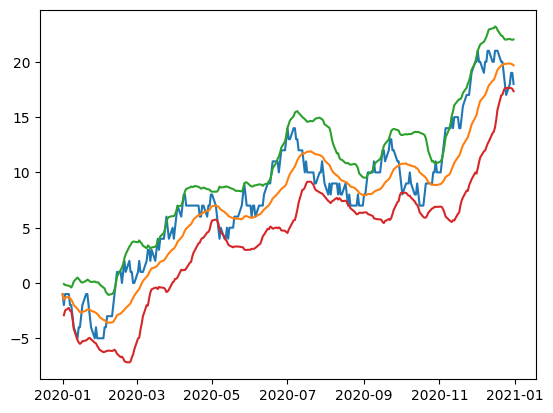

In [252]:
#在股票市场中有一个指标为BOLL 指标，它由中轨线、上轨线、下轨线这三根线构成，
#具体的计算方法分别是N 日均值线、N日均值加两倍N 日标准差线、N 日均值减两倍N 日标准差线。利用rolling 对象计算N=30 的BOLL 指标
r = s.rolling('30D')
plt.plot(s)
plt.title='BOLL LINES'
plt.plot(r.mean())
plt.plot(r.mean()+2*r.std())
plt.plot(r.mean()-2*r.std())

In [253]:
#对于shift 函数而言，作用在datetime64 为索引的序列上时，可以指定freq 单位进行滑动
s.shift(freq='50D').head()#从第50天开始统计

2020-02-20   -1
2020-02-21   -2
2020-02-22   -1
2020-02-25   -1
2020-02-26   -2
dtype: int32

In [254]:
#datetime64[ns] 的序列进行diff 后就能够得到timedelta64[ns] 的序列，这能够使用户方便地观察有序时间序列的间隔
my_series = pd.Series(s.index)
my_series.head()

0   2020-01-01
1   2020-01-02
2   2020-01-03
3   2020-01-06
4   2020-01-07
dtype: datetime64[ns]

In [255]:
my_series.diff(1).head()

0      NaT
1   1 days
2   1 days
3   3 days
4   1 days
dtype: timedelta64[ns]

## 10.5.2 重采样

In [256]:
#重采样对象resample 和第四章中分组对象groupby 的用法类似，前者是针对时间序列的分组计算而设计的分组对象。
s.resample('10D').mean().head()#计算10天的均值

2020-01-01   -2.000000
2020-01-11   -3.166667
2020-01-21   -3.625000
2020-01-31   -4.000000
2020-02-10   -0.375000
Freq: 10D, dtype: float64

In [258]:
#可以利用内置函数
s.resample('20D').apply(lambda x:x.max()-x.min()).head()#计算20天的极差

2020-01-01    4
2020-01-21    4
2020-02-10    5
2020-03-01    3
2020-03-21    4
Freq: 20D, dtype: int32

In [278]:
idx = pd.date_range('20200101 8:21:18','20200101 9:27:37',freq='77s')
data = np.random.randint(-1,2,len(idx)).cumsum()
s = pd.Series(data,index =idx)
s.head()#区间左闭右开

2020-01-01 08:21:18    0
2020-01-01 08:22:35   -1
2020-01-01 08:23:52   -1
2020-01-01 08:25:09   -2
2020-01-01 08:26:26   -1
Freq: 77S, dtype: int32

In [280]:
#默认情况下起始值的计算方法是从最小值时间戳对应日期的午夜00:00:00 开始增加freq直到不超过该最小时间戳的最大时间戳，由此对应的时间戳为起始值
s.resample('7min').mean().head()

2020-01-01 08:17:00   -0.666667
2020-01-01 08:24:00   -0.600000
2020-01-01 08:31:00   -2.333333
2020-01-01 08:38:00   -1.800000
2020-01-01 08:45:00    0.000000
Freq: 7T, dtype: float64

In [283]:
#希望从序列的最小时间戳开始依次增加freq 进行分组，此时可以指定origin 参数为start
s.resample('7min',origin='start').mean().head()

2020-01-01 08:21:18   -0.833333
2020-01-01 08:28:18   -1.200000
2020-01-01 08:35:18   -2.166667
2020-01-01 08:42:18   -0.800000
2020-01-01 08:49:18   -0.666667
Freq: 7T, dtype: float64